In [1]:
import astropy.coordinates as coord
import astropy.table as at
from astropy.io import fits
import astropy.units as u
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from pyia import GaiaData

# gala
import gala.coordinates as gc
import gala.dynamics as gd
import gala.potential as gp
from gala.units import galactic

In [17]:
dr16 = fits.getdata('/Users/apricewhelan/data/APOGEE_beta/allStarLite-r13-l33-58932beta-GaiaDR2-xmatch.fits')

In [19]:
row = at.Table(dr16[dr16['APOGEE_ID'].astype(str) == '2M00093859-5202193'])

In [39]:
row['LOGG', 'TEFF']

LOGG,TEFF
float32,float32
1.4416168,4432.703


In [40]:
row['VHELIO_AVG', 'radial_velocity']

VHELIO_AVG,radial_velocity
float32,float64
-0.712103,-0.6816017074217442


In [45]:
row['GAIA_PMRA', 'pmra']

GAIA_PMRA,pmra
float64,float64
6.528417415735575,6.528417415735575


In [46]:
row['GAIA_PMDEC', 'pmdec']

GAIA_PMDEC,pmdec
float64,float64
-4.119270595672818,-4.119270595672818


In [21]:
g = GaiaData(row[0])

In [2]:
# c = g.get_skycoord()
c = coord.SkyCoord(ra=2.410821*u.deg,
                   dec=-52.038704*u.deg,
                   distance=4.7905*u.kpc,
                   pm_ra_cosdec=6.52841742*u.mas/u.yr,
                   pm_dec=-4.1192706*u.mas/u.yr,
                   radial_velocity=-0.712103*u.km/u.s)

In [3]:
galcen = c.transform_to(coord.Galactocentric())
w0 = gd.PhaseSpacePosition(galcen.data)

In [4]:
pot = gp.MilkyWayPotential()
orbit = pot.integrate_orbit(w0, dt=1, n_steps=6000)

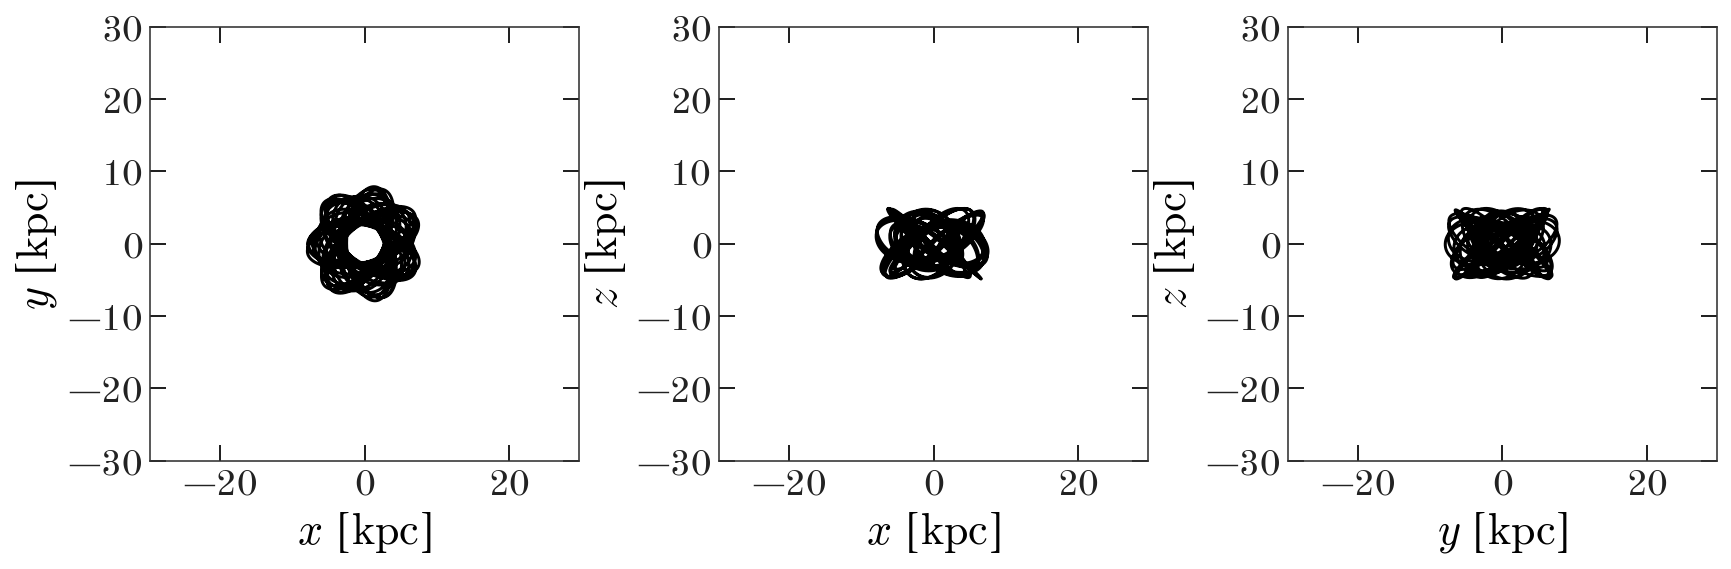

In [5]:
fig = orbit.plot()

for ax in fig.axes:
    ax.set_xlim(-30, 30)
    ax.set_ylim(-30, 30)

In [6]:
orbit.pericenter(), orbit.apocenter()

(<Quantity 3.23975554 kpc>, <Quantity 8.13841316 kpc>)

In [7]:
orbit.eccentricity()

<Quantity 0.43053129>